In [1]:
## importing stuff
import os
import pickle
from sys import path as syspath
syspath.append(os.path.expanduser("~/srdjan_functs/"))
import javabridge
from bioformats import JARS as bfJARS
javabridge.start_vm(class_path=bfJARS, max_heap_size="20G")
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
# %aimport islets

from IPython.display import display
import pandas as pd

from islets.Recording import Recording, saveMovie
from islets.Regions import Regions
from islets.numeric import power_spectrum, rebin
from islets.utils import show_movie, saveRois
from islets.Regions import getPeak2BoundaryDF, getGraph_of_ROIs_to_Merge, mergeBasedOnGraph

from caiman import movie as cmovie

from matplotlib.colors import LogNorm

/opt/tljh/user/envs/physio/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.decomposition.incremental_pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.



In [2]:
# from copy import deepcopy
fracSaturTh = .05
# movieFreq = 2
cmap = plt.cm.Greys
cmap.set_bad("lime")
pd.set_option('display.max_rows', 100)

In [3]:
# rec = Recording("/data/Sandra/2019/2019_08_27/Experiment30.lif")
# rec.metadata

In [4]:
# rec = Recording("/data/Sandra/2020/2020_07_01/Experiment58a.lif")
# rec = Recording("/data/Sandra/2019/2019_08_12/Experiment28.lif")``a
# rec = Recording("/data/Sandra/2020/2020_07_03/Series008.nd2")
# rec = Recording("/data/Sandra/2019/2019_11_11/Experiment40b.lif")
# rec = Recording("/data/Sandra/2019/2019_11_12/Experiment41b.lif")
# rec = Recording("/data/Sandra/2020/2020_07_08/Experiment59a.lif")
rec = Recording("/data/Sandra/2020/2020_07_08/Experiment59a.lif")
# rec = Recording("/data/MB2020_lifs/2012/2012_01_31/Pancreas_Islet_OGB13.lif")

In [5]:
rec.metadata

,Name,SizeT,SizeX,SizeY,pxSize,pxUnit,bit depth,Frequency,Start time,End time,Duration
0,Series002,1659,256,256,1.42,µm,uint8,5.0,2020-07-08 11:22:19,2020-07-08 11:27:50.801000435,00:05:31.801000
1,Series003,17700,256,256,1.42,µm,uint8,5.0,2020-07-08 11:27:52,2020-07-08 12:26:52.002000159,00:59:00.002000
2,Series004,10479,256,256,1.42,µm,uint8,5.0,2020-07-08 12:26:54,2020-07-08 13:01:49.800999928,00:34:55.800999


In [6]:
ser = "Series003-4"#rec.metadata.Name[7]

In [7]:
rec.import_series(ser, isLineScan=False, onlyMeta=False, restrict=(0,5160))

In [8]:
metadata = rec.Series[ser]['metadata']

In [9]:
metadata

Name                                                       Series003-4
SizeT                                                            25800
SizeX                                                              256
SizeY                                                              256
pxSize                                                            1.42
pxUnit                                                              µm
bit depth                                                        uint8
Frequency                                                            5
Start time                                         2020-07-08 11:27:52
End time                                 2020-07-08 12:26:52.002000159
Duration                                        0 days 00:59:00.002000
time_range                                                   (0, 5160)
frame_range                                                 (0, 25800)
individual Series            Name  SizeT          Start time       ...
Name: 

In [10]:
movie = cmovie(rec.Series[ser]['data'],fr = metadata.Frequency)

In [11]:
movie.shape

(25800, 256, 256)

In [12]:
movie.fr

5.0

In [13]:
meanImage = movie.mean(0)

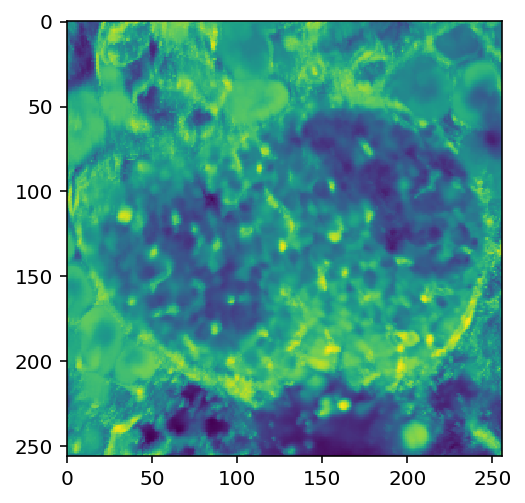

In [15]:
plt.imshow(meanImage, norm=LogNorm())

In [16]:
Nsatur = (movie==movie.max()).sum(0)

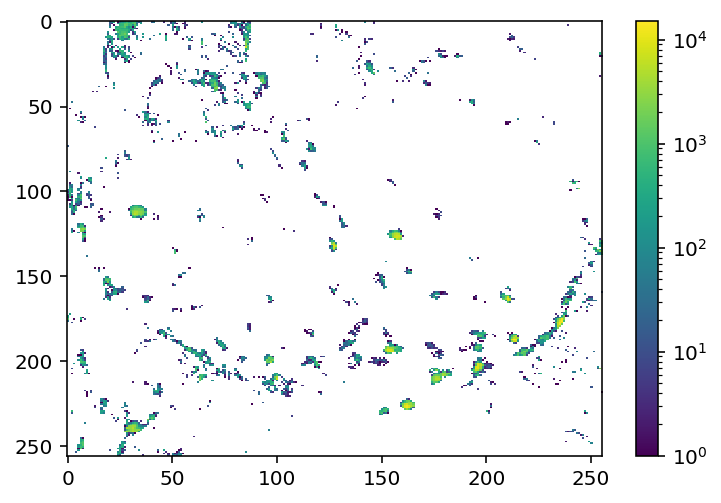

In [17]:
plt.imshow(Nsatur.astype(float),
           norm=LogNorm(),
           aspect="auto"
          )
plt.colorbar()

In [18]:
plt.rcParams["animation.embed_limit"] = 200

In [19]:
# from process_series import saveMovie

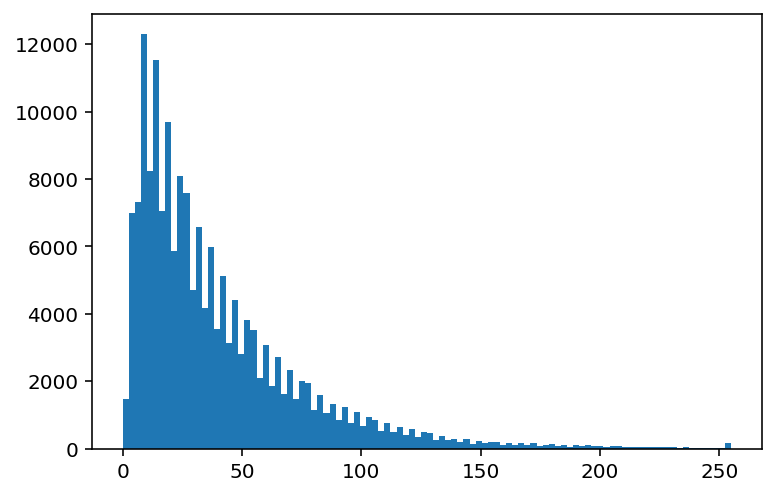

In [20]:
plt.hist(movie[::100,::10,::10].flatten(),100);

In [58]:
# saveMovie(movie[:], "embed")

#### Playing with `high_pass_filter_space`

In [157]:
# r0 = Regions(cv2.GaussianBlur(exim,(11,11),-1)[:,:50], gSig_filt=None)
r0 = Regions(exim, gSig_filt=None, img_th=.02)
r0.Freq=1

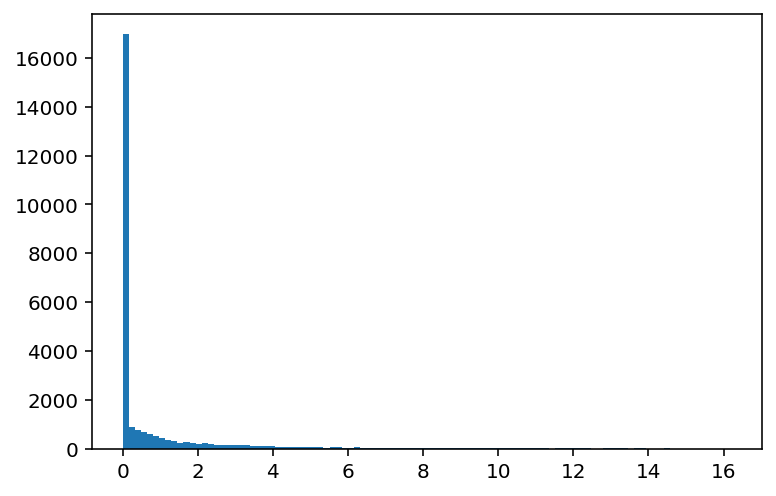

In [159]:
plt.hist(processed.flat,100);

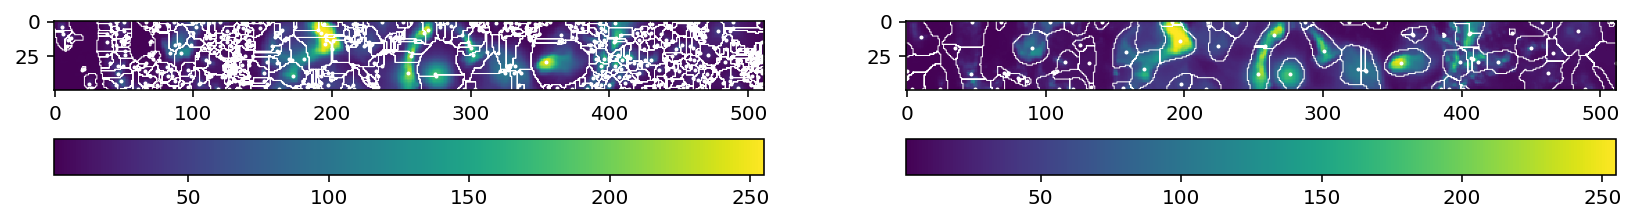

In [164]:
fs = 10
processed = high_pass_filter_space(exim,(fs,fs))
# processed = np.maximum(0,processed)
r1 = Regions(processed, gSig_filt=(None), img_th=0-.02)

fig,axs = plt.subplots(1,2,figsize=(14,3))
for ax,r in zip(axs,[r0,r1]):
    im = ax.imshow(exim)
    r.plotEdges(ax=ax, image=False,color='w',lw=.5)
    r.plotPeaks(ax=ax, image=False,color='w',)
    plt.colorbar(im, ax=ax, orientation="horizontal")

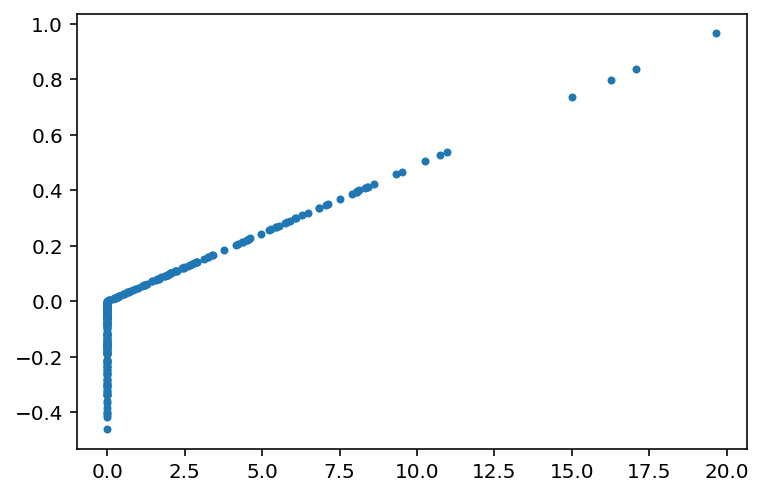

In [67]:
plt.plot(r0.image.flat[::100], r1.image.flat[::100],".")

In [20]:
# saveMovie(cmovie(rebin(movie[:1000],(2,2),axis=(1,2)), fr=movie.fr),"embed")

In [21]:
from islets.numeric import get_sep_th

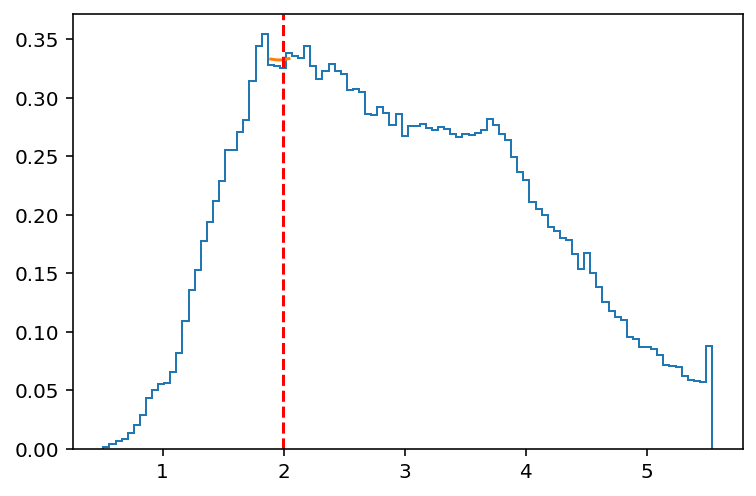

In [23]:
th = get_sep_th(meanImage.flatten(),log=True,plot=True)

In [25]:
import cv2

In [26]:
tmp = cv2.GaussianBlur(meanImage,(5,5),-1,-1)[200:250]

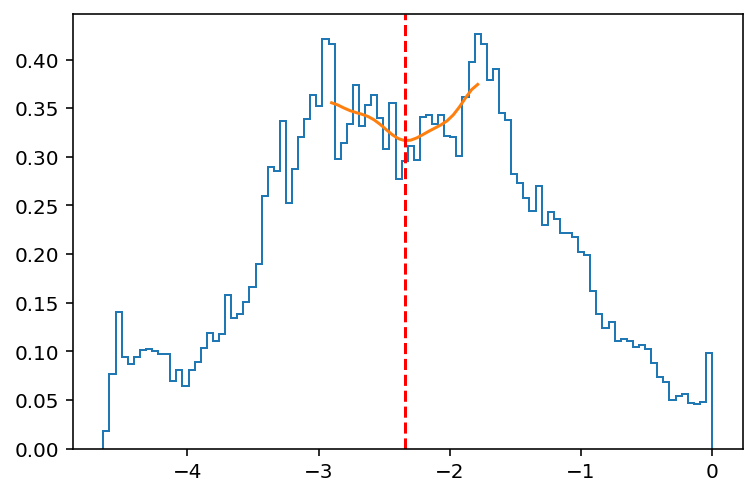

In [27]:
th = get_sep_th(tmp.flatten()/tmp.max(), plot=True, log=True)

In [29]:
rr = Regions({"mean":tmp},
             gSig_filt=(None),
             img_th=th,
             processes=1,
             mode="mean",
             diag=True)

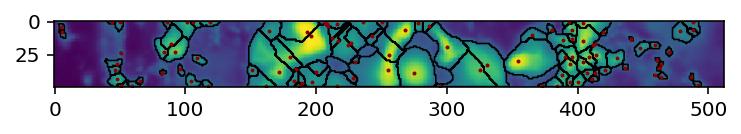

In [30]:
ax = plt.subplot(111)
ix = rr.df.index[:]
rr.plotEdges(ax=ax, ix=ix)
rr.plotPeaks(ax=ax,ix=ix)

In [31]:
tmp1 = meanImage[200:250]

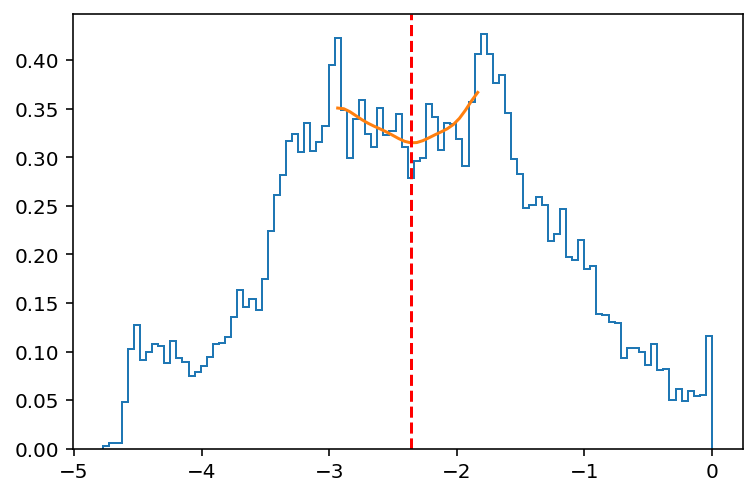

In [32]:
th = get_sep_th(tmp1.flatten()/tmp1.max(), plot=True, log=True)

In [50]:
from caiman.motion_correction import high_pass_filter_space

In [52]:
hpf = high_pass_filter_space(meanImage,(10,10))

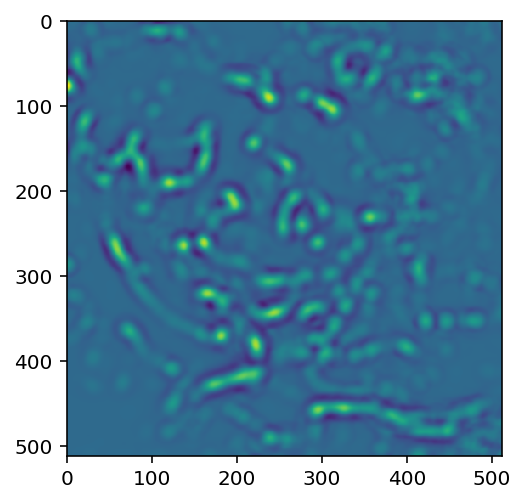

In [54]:
plt.imshow(hpf)

In [59]:
cv2.filter2D??

In [58]:
cv2.filter2D(meanImage,-1,)

TypeError: filter2D() missing required argument 'kernel' (pos 3)

In [57]:
high_pass_filter_space??

In [51]:
rr1 = Regions({"mean":meanImage},
             gSig_filt=(10,),
             img_th=th,
#              full=False,
#              processes=1,
             mode="mean",
             diag=True)

Cannot initialize with diagonal crawl. Reverting to diag=False


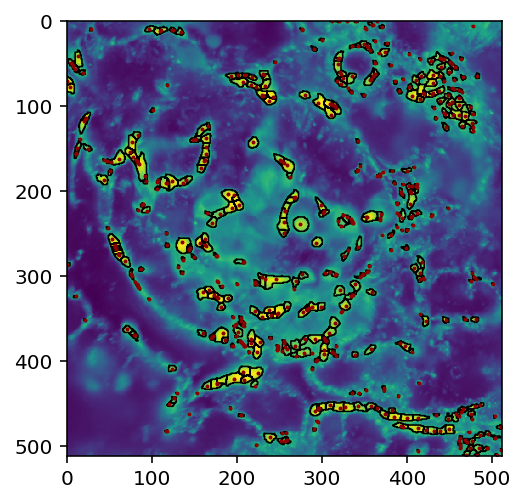

In [48]:
ax = plt.subplot(111)
ix = rr1.df.index[:]
rr1.plotEdges(ax=ax, ix=ix)
rr1.plotPeaks(ax=ax,ix=ix)

In [35]:
tmp2 = cv2.GaussianBlur(meanImage,(5,5),-1,-1)[200:250]-cv2.GaussianBlur(meanImage,(11,11),-1,-1)[200:250]

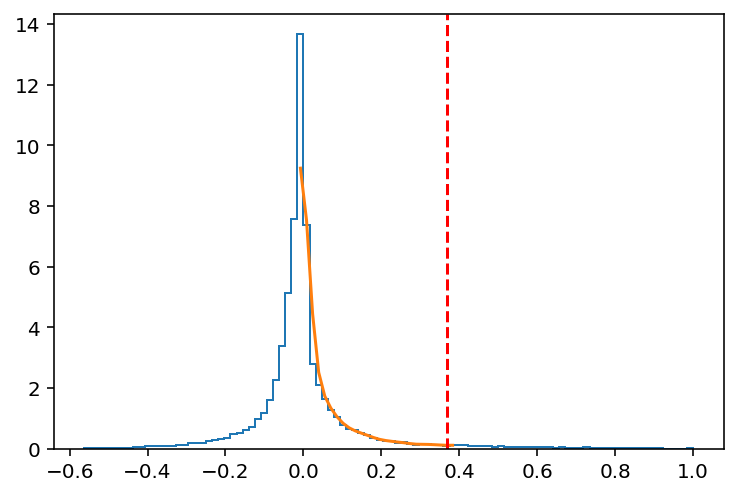

In [37]:
th = get_sep_th(tmp2.flatten()/tmp2.max(), plot=True, log=False)

In [40]:
rr2 = Regions({"mean":tmp2},
             gSig_filt=(None),
             img_th=0,
#              processes=1,
             mode="mean",
             diag=True)

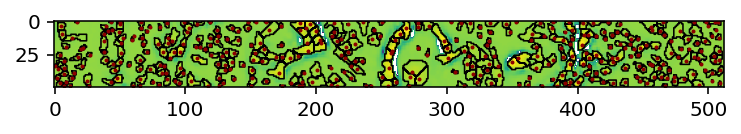

In [41]:
ax = plt.subplot(111)
ix = rr2.df.index[:]
rr2.plotEdges(ax=ax, ix=ix)
rr2.plotPeaks(ax=ax, ix=ix)

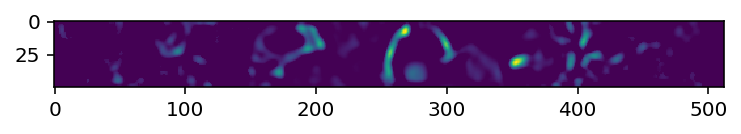

In [43]:
plt.imshow(rr1.image)

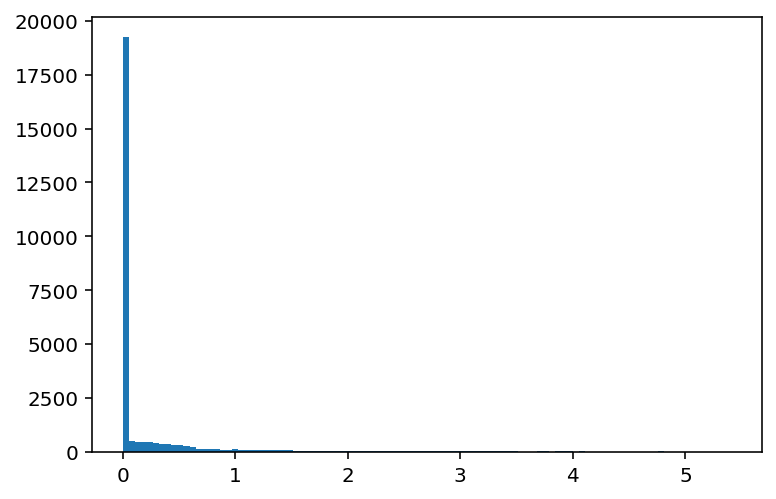

In [45]:
plt.hist(rr1.image.flatten(),100);

In [122]:
import cv2

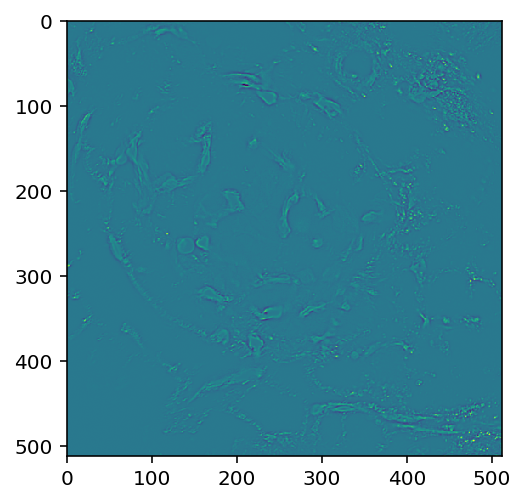

In [126]:
plt.imshow(meanImage-cv2.GaussianBlur(meanImage,(3,3),-1,-1))

### Check for wiggles

In [33]:
from islets.numeric import get_sep_th

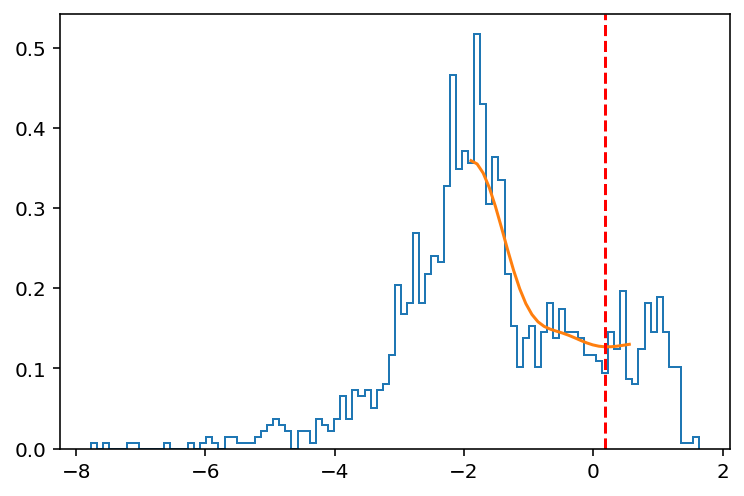

In [34]:
th = get_sep_th(regions.df.peakValue.values, log=True, plot=True)

In [37]:
# x = np.vstack([movie[:,point[0],point[1]] for point in regions.df.peak])
x = np.vstack(regions.df.trace)
f,p = power_spectrum(x, fr=metadata.Frequency)
f,p = f[f>0.5],np.abs(p[f>0.5])

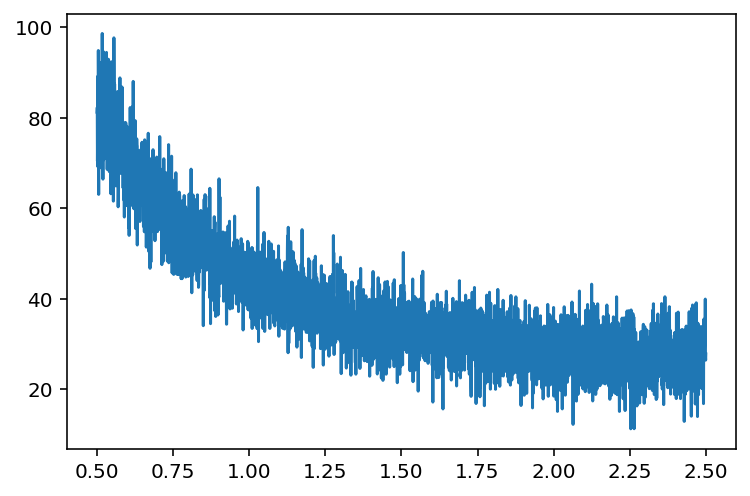

In [38]:
n = 3
plt.plot(rebin(f,n),rebin(p,n))

In [40]:
# f,p = power_spectrum(np.vstack(data[:,0]),fr=metadata.Frequency,mean=False)

In [41]:
# plt.boxplot(p[:,2:100],positions=f[2:100], showfliers=False);
# plt.plot(f[2:],p.mean(0)[2:],lw=.6)
# plt.xscale("symlog")

In [42]:
# plt.plot(*sum([(f,pp) for pp in p[:10]],tuple()),lw=.3)

### Continue

In [23]:
5/metadata.pxSize

3.5211267605633805

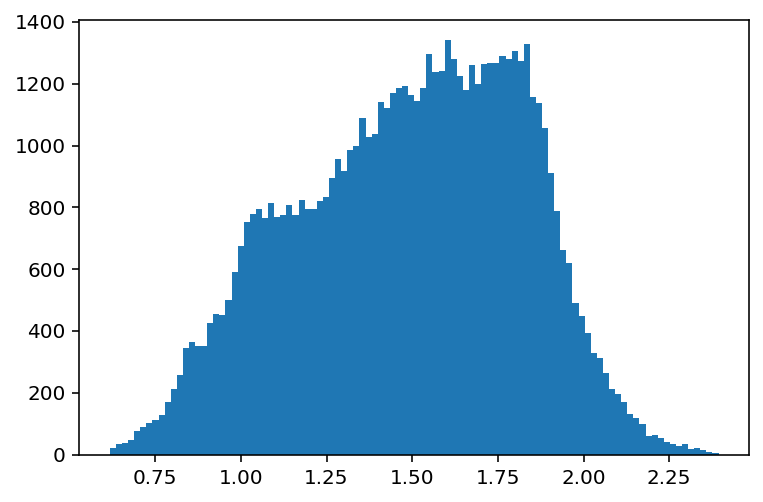

In [24]:
plt.hist(np.log10(meanImage.flat),100,);

In [25]:
movie[(slice(None),)+np.where(Nsatur>fracSaturTh*len(movie))] = movie.max()

In [26]:
regions = Regions(movie, diag=False, gSig_filt=(4), img_th=-np.inf, processes=1)

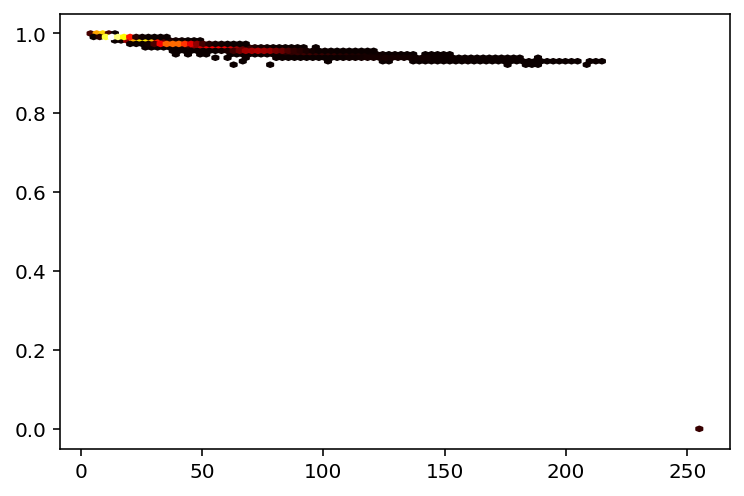

In [47]:
plt.hexbin(regions.statImages["mean"].flatten(),regions.statImages["diff_std"].flatten(), cmap="hot", mincnt=1)

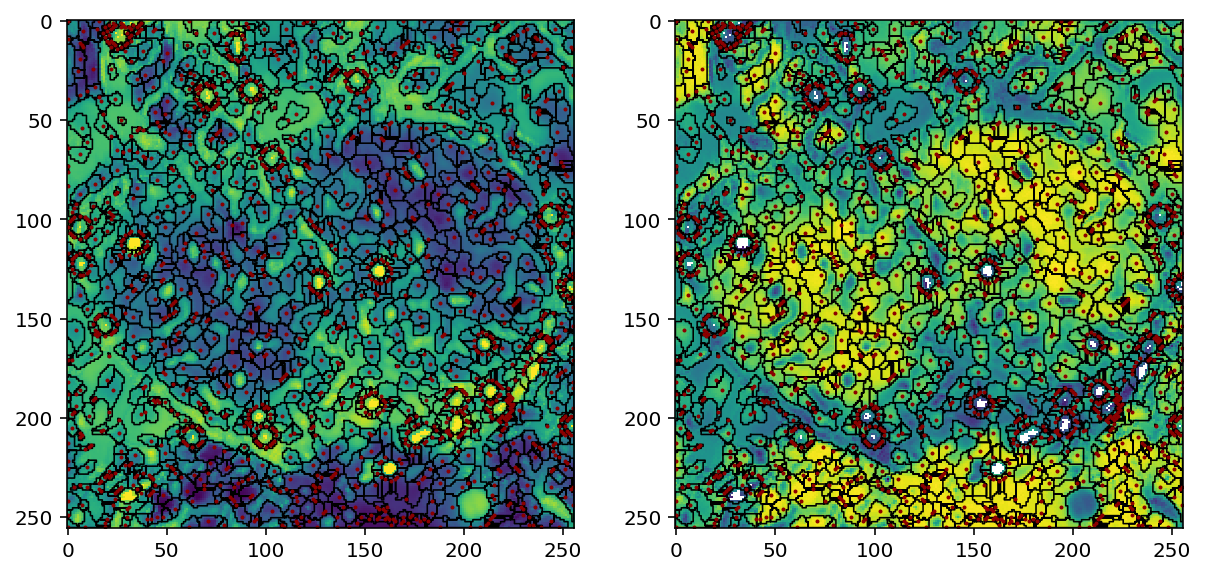

In [49]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
for k,ax in zip(["mean","diff_std"],axs):
    ax.imshow(regions.statImages[k], norm=LogNorm())
    regions.plotEdges(ax=ax,image=False)
    regions.plotPeaks(ax=ax,image=False)

In [28]:
regions.update(movie)

In [29]:
regions.detrend_traces()

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:126: RuntimeWarning:

divide by zero encountered in log

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:126: RuntimeWarning:

invalid value encountered in log

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:126: RuntimeWarning:

divide by zero encountered in log

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:126: RuntimeWarning:

invalid value encountered in log

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:126: RuntimeWarning:

divide by zero encountered in log

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:126: RuntimeWarning:

invalid value encountered in log

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:126: RuntimeWarning:

divide by zero encountered in log

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:126: RuntimeWarning:

invalid value encountered in log

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:126: RuntimeWarning:

divide by zero encountered in log

/home/jupyter-

movie frame rate (5.0) and inferred frame (5.0) rate are different!
Nrebin = 2


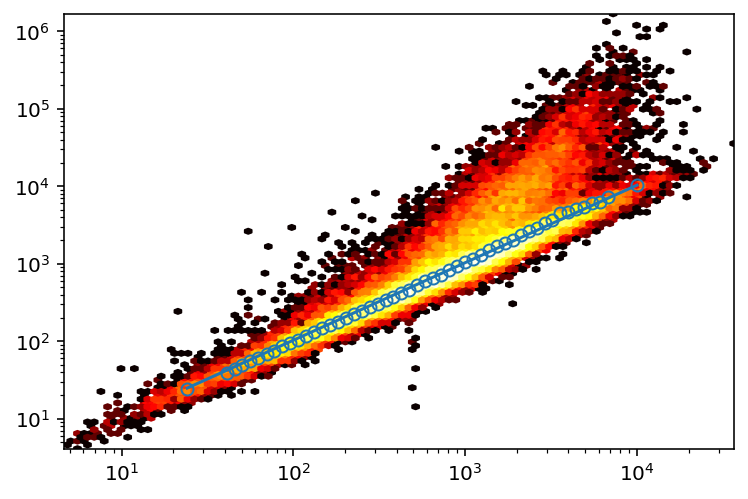

In [30]:
regions.infer_gain(plot=True)

In [31]:
regions.gain

1.0282986249459265

In [32]:
ts = 4
regions.fast_filter_traces(ts)

movie frame rate (5.0) and inferred frame (5.0) rate are different!
Nrebin = 1
7


/home/jupyter-srdjan/srdjan_functs/islets/Regions.py:537: RuntimeWarning:

invalid value encountered in sqrt



/opt/tljh/user/envs/physio/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

invalid value encountered in greater



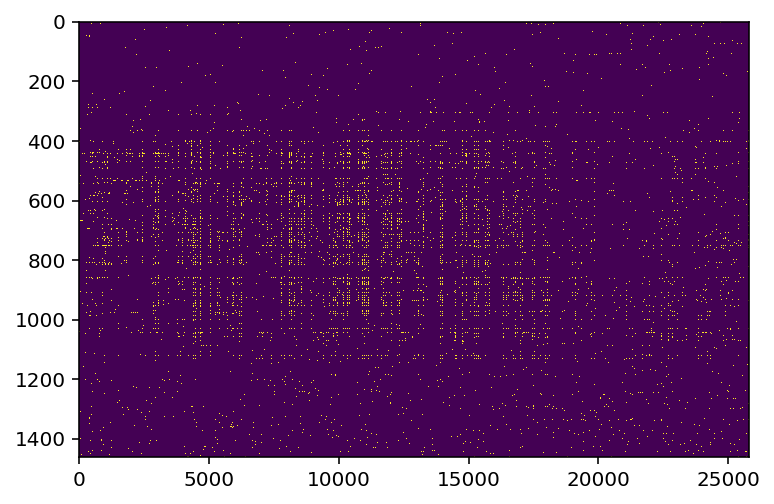

In [50]:
x = np.vstack(regions.df["zScore_%g"%ts])
# x = rebin(x,100,1)
plt.imshow(x>3, aspect="auto")

In [264]:
regions.df.columns

Index(['peak', 'pixels', 'peakValue', 'size', 'interest', 'edges', 'boundary',
       'neighbors', 'Nneighbors', 'trace', 'slower_30', 'faster_30', 'trend',
       'detrended', 'slower_10', 'faster_10', 'zScore_10'],
      dtype='object')

In [263]:
regions.fast_filter_traces(10)

movie frame rate (58.96883544378628) and inferred frame (58.96883544378628) rate are different!
Nrebin = 39
5
